In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [324]:
###### Day 52 untreated dopaminergic neurons (DA)
### only donors with at least 10 cells
## 173 individuals 54,217 cells

In [325]:
##### k=10 nearest neighbours
## resulting in 1,024 pseudo cells

In [326]:
### 5 PCs as envs

In [327]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/5_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [328]:
nrow(df)
head(df,2)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.6279698,14,14_23499321_C_A
1,ENSG00000159063,0.3248334,11,11_77809456_C_T


In [329]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 4

[1] 0.00390625

In [330]:
df_5pcs = df

In [331]:
### 10 PCs as envs

In [332]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/10_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [333]:
nrow(df)
head(df)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.8346446,14,14_23499321_C_A
1,ENSG00000159063,0.7138645,11,11_77809456_C_T
2,ENSG00000160404,0.6946467,9,9_130494667_G_A
3,ENSG00000123159,0.4048248,19,19_14602318_A_G
4,ENSG00000106077,0.9587475,7,7_73150694_A_C
5,ENSG00000120915,0.3873232,8,8_27390192_G_A


In [334]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 28

[1] 0.02734375

In [335]:
df_10pcs = df

In [336]:
### 20 PCs as envs

In [337]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/20_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [338]:
nrow(df)
head(df)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.13757723,14,14_23499321_C_A
1,ENSG00000159063,0.86622504,11,11_77809456_C_T
2,ENSG00000160404,0.73205099,9,9_130494667_G_A
3,ENSG00000123159,0.02477989,19,19_14602318_A_G
4,ENSG00000106077,0.39760680,7,7_73150694_A_C
5,ENSG00000120915,0.81826154,8,8_27390192_G_A


In [339]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 301

[1] 0.2939453

In [340]:
df_20pcs = df

In [341]:
### 50 PCs as envs

In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/50_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [3]:
nrow(df)
head(df)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.06699201,14,14_23499321_C_A
1,ENSG00000159063,0.15095145,11,11_77809456_C_T
2,ENSG00000160404,0.43895353,9,9_130494667_G_A
3,ENSG00000123159,0.00548665,19,19_14602318_A_G
4,ENSG00000106077,0.17000734,7,7_73150694_A_C
5,ENSG00000120915,0.80816582,8,8_27390192_G_A


In [4]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 939

[1] 0.9169922

In [5]:
df_50pcs = df

In [359]:
#### Compare results

In [360]:
df0 = df_5pcs[df_5pcs$qv<0.05,]
df1 = df_10pcs[df_10pcs$qv<0.05,]
df2 = df_20pcs[df_20pcs$qv<0.05,]
df3 = df_50pcs[df_50pcs$qv<0.05,]

In [361]:
egenes_5 = df0$gene
egenes_10 = df1$gene
egenes_20 = df2$gene
egenes_50 = df3$gene

In [362]:
length(egenes_5)
length(egenes_10)
length(egenes_20)
length(egenes_50)

[1] 4

[1] 28

[1] 301

[1] 939

In [363]:
egenes = c(length(egenes_5), length(egenes_10), length(egenes_20), length(egenes_50))
n_genes = 1024
egenes_pct = egenes/n_genes

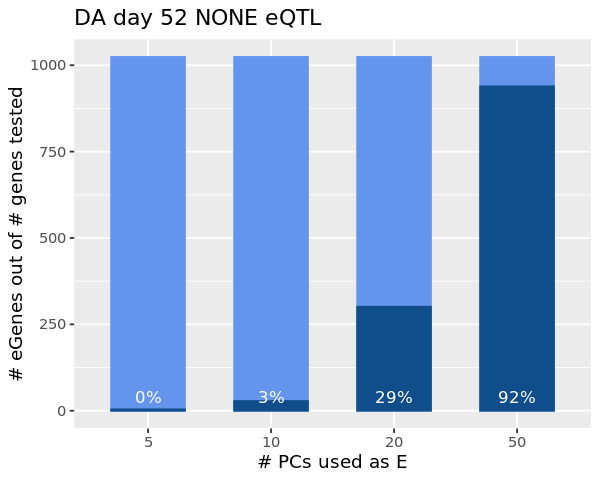

In [364]:
df = data.frame(n_PC = c(5,10,20,50), n_eGenes = egenes, n_genes = n_genes)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_PC), y = n_genes)) + ggtitle("DA day 52 NONE eQTL") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_PC), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# PCs used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=40, label= paste0(round(egenes_pct[1],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=40, label= paste0(round(egenes_pct[2],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=40, label= paste0(round(egenes_pct[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=40, label= paste0(round(egenes_pct[4],digits=2)*100,"%"), size = 3.5, col = "white")

In [263]:
dfs = list(df_5pcs, df_10pcs, df_20pcs, df_50pcs)
npcs = c("5","10","20","50")

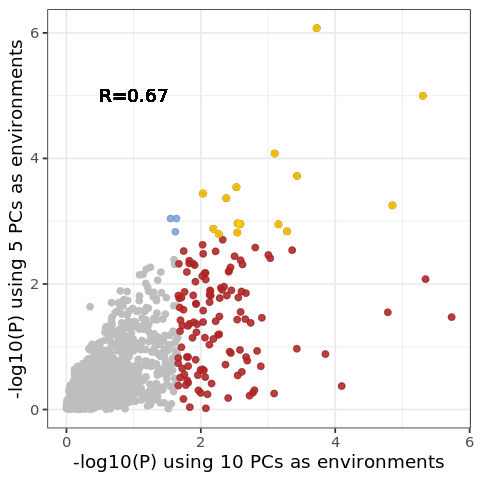

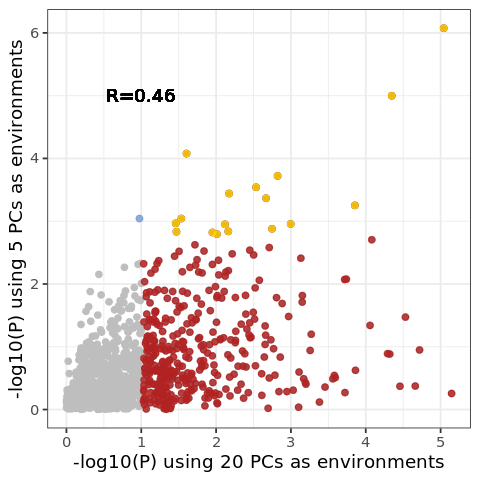

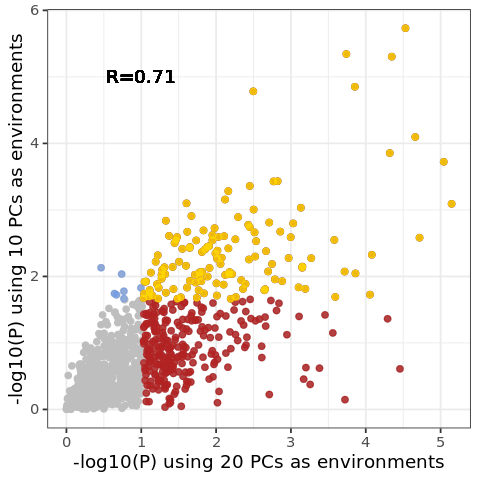

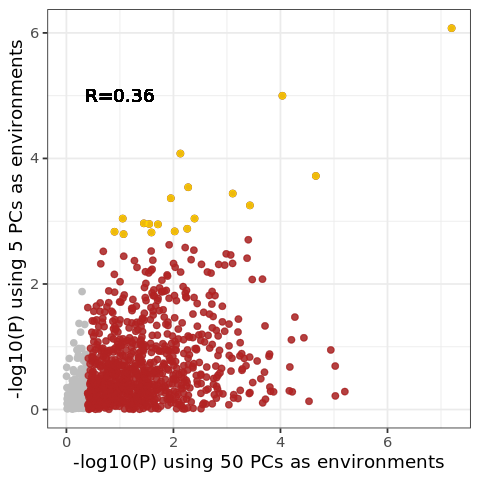

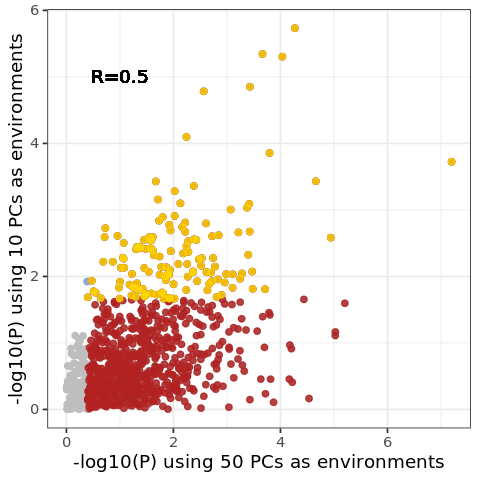

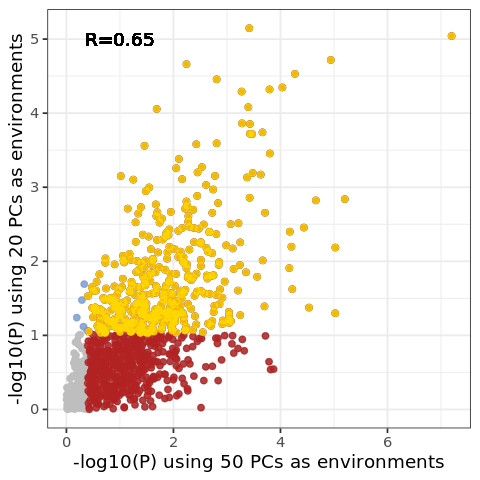

In [275]:
options(repr.plot.width = 4, repr.plot.height = 4)
i = 1
for (df1 in dfs){
    npc1 = npcs[i]
    j=1
    for (df2 in dfs){
        npc2 = npcs[j]
        if (i==j){break}
        else{
            df_to_plot = inner_join(df1, df2, by = c("gene","chrom","snp_id"))
            p = ggplot(df_to_plot, aes(x = -log10(pv.x), y = -log10(pv.y))) + geom_point(col = 'grey') 
            p = p + geom_point(aes(x = -log10(pv.x), y = -log10(pv.y)), 
                               data = df_to_plot[df_to_plot$qv.y<0.05,], col = "cornflowerblue", alpha = 0.5)
            p = p + geom_point(aes(x = -log10(pv.x), y = -log10(pv.y)), 
                               data = df_to_plot[df_to_plot$qv.x<0.05,], col = "firebrick", alpha = 0.8) 
            p = p + geom_point(aes(x = -log10(pv.x), y = -log10(pv.y)), 
                               data = df_to_plot[df_to_plot$qv.x<0.05 & df_to_plot$qv.y<0.05,], 
                               col = "gold", alpha = 0.8) 
            p = p + theme_bw() 
            p = p + xlab(paste0("-log10(P) using ",npc1," PCs as environments"))
            p = p + ylab(paste0("-log10(P) using ",npc2," PCs as environments"))
            corr = cor(-log10(df_to_plot$pv.x), -log10(df_to_plot$pv.y))
            p = p + geom_text(x=1, y=5, label=paste0("R=",round(corr, digits=2)))
            print(p)
        }
        j = j+1
    }
    i = i+1
}

In [218]:
df3 = inner_join(df_10pcs, df_20pcs, by = c("gene","chrom","snp_id"), suffix = c(".10",".20"))
nrow(df3)
head(df3)

[1] 1024

gene,pv.10,chrom,snp_id,qv.10,pv.20,qv.20
ENSG00000100804,0.8408623,14,14_23499321_C_A,0.2691345,0.132014397,0.05869176
ENSG00000159063,0.7972347,11,11_77809456_C_T,0.2605883,0.929691081,0.19190215
ENSG00000160404,0.4569540,9,9_130494667_G_A,0.1944170,0.248832397,0.08286649
ENSG00000123159,0.1765076,19,19_14602318_A_G,0.1238617,0.009560015,0.01828463
ENSG00000106077,0.4115576,7,7_73150694_A_C,0.1877355,0.098627722,0.05169044
ENSG00000120915,0.9464081,8,8_27390192_G_A,0.2885205,0.890920852,0.18555614


In [215]:
cor.test(-log10(df3$pv.10),-log10(df3$pv.20))


	Pearson's product-moment correlation

data:  -log10(df3$pv.10) and -log10(df3$pv.20)
t = 32.655, df = 1022, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6832208 0.7432972
sample estimates:
      cor 
0.7145739 


[1] 0.7145739

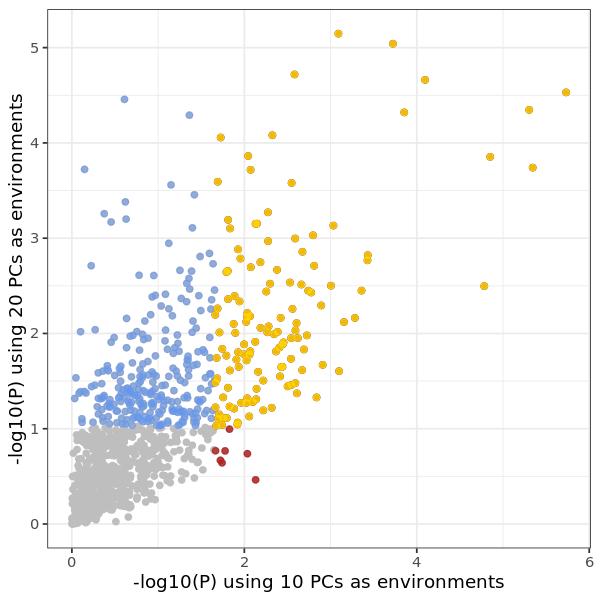

In [216]:
cor(-log10(df3$pv.10),-log10(df3$pv.20))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df3, aes(x = -log10(pv.10), y = -log10(pv.20))) + geom_point(col = 'grey') +
    geom_point(aes(x = -log10(pv.10), y = -log10(pv.20)), data = df3[df3$qv.20<0.05,], col = "cornflowerblue", alpha = 0.5)+
    geom_point(aes(x = -log10(pv.10), y = -log10(pv.20)), data = df3[df3$qv.10<0.05,], col = "firebrick", alpha = 0.8) + 
    geom_point(aes(x = -log10(pv.10), y = -log10(pv.20)), data = df3[df3$qv.10<0.05 & df3$qv.20<0.05,], col = "gold", alpha = 0.8) + 
    theme_bw() + xlab("-log10(P) using 10 PCs as environments") + ylab("-log10(P) using 20 PCs as environments")